<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from IPython.display import display
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-09-27 13:58:01--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-09-27 13:58:02 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    certifi-2019.9.11          |           py36_0         154 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2019.8.28  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1       --> 2019.8.28-0      anaconda
    certifi:         2019.6.16-py36_1  --> 2019.9.11-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_1 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

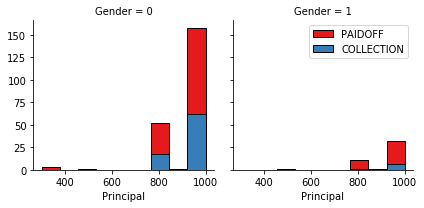

In [92]:
import seaborn as sns

# Loans training data analysis
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

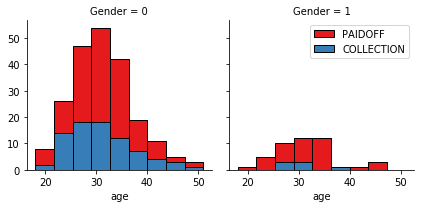

In [93]:
# Loans training data analysis
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

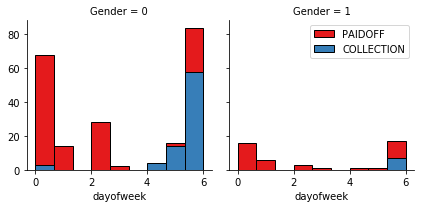

In [94]:
# Load training data analysis
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [95]:
# Set the threshold values less than day 4 on training data
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
display(df.head())

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [96]:
# Status by gender for training data
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [97]:
# Convert gender to binary values in loan training data
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

## One Hot Encoding  
#### How about education?

In [98]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [99]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [100]:
# One hot encoding - loan training data
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [101]:
# Load training data feature set definition
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [102]:
# Loan training data labels
y = df['loan_status'].values
y[0:50]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [103]:
# Loan Training Data Normalisation
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [104]:
# import librarires for KNN
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

# Train Test Split - for fiting and prediction of algorithms
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


mean accuracy list: [0.89855072 0.82608696 0.83333333 0.8115942  0.81884058 0.79347826
 0.80072464 0.78985507 0.7826087  0.77898551]
mean accuracy list: [0.67142857 0.58571429 0.72857143 0.7        0.77142857 0.71428571
 0.8        0.75714286 0.74285714 0.68571429]
std dev accuracy list: [0.05613914 0.05887676 0.05315141 0.05477226 0.05018915 0.05399492
 0.04780914 0.05125253 0.05223852 0.05548619]


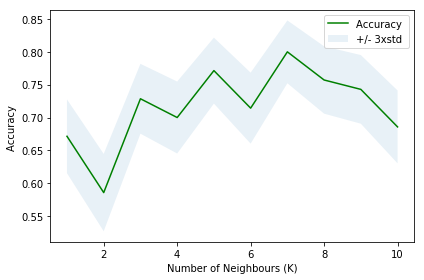

In [105]:
# set a range for k optimisation
k_array = np.arange(1,11)
train_mean_accuracy = np.zeros((len(k_array)))
test_mean_accuracy = np.zeros((len(k_array)))
test_std_accuracy = np.zeros((len(k_array)))
# Train Model and Predict
for k in k_array:
    # Train Model
    neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    # Predict target values
    yhat = neighbour.predict(X_test)
    yhat[0:5]
    # Accuracy Evaluation
    train_mean_accuracy[k-1] = (metrics.accuracy_score(y_train, neighbour.predict(X_train)))
    test_mean_accuracy[k-1] = (metrics.accuracy_score(y_test, yhat))
    test_std_accuracy[k-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print (f"mean accuracy list: {train_mean_accuracy}")
print (f"mean accuracy list: {test_mean_accuracy}")
print (f"std dev accuracy list: {test_std_accuracy}")
# Plot the model accuracy for the range of k
plt.plot(range(1,len(k_array)+1), test_mean_accuracy,'g')
plt.fill_between(range(1,len(k_array)+1),test_mean_accuracy - 1 * test_std_accuracy, test_mean_accuracy + 1 * test_std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [197]:
# k = 7 is the optimum value based on mean + std accuracy calculated above
optimised_k = test_mean_accuracy.argmax()+1
print( "The best accuracy is: ", test_mean_accuracy.max(), "with k =", optimised_k) 

The best accuracy is:  0.8 with k = 7


# Decision Tree

In [198]:
# Import the scikit learn decision tree libraries
from sklearn.tree import DecisionTreeClassifier

In [199]:
# Setup the Decision Tree Model
depths = np.arange(1,10)
decision_comb_score = {}
for depth in depths:
    decision = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    decision.fit(X_train, y_train)
    decision_yhat = decision.predict(X_test)
    jaccard = metrics.jaccard_similarity_score(y_test, decision_yhat)
    f1 = metrics.f1_score(y_test, decision_yhat, average='weighted')
    decision_comb_score[depth] = f1 + jaccard
    print(f'f1_{depth}: {f1}')
    print(f'jaccard_{depth}: {jaccard}')
    print(f'Total Score for depth: {depth} is: {decision_comb_score[depth]}')
optimum_depth = max(decision_comb_score, key=decision_comb_score.get)
print(f'The maximum combine jaccard and f1 score is: {max(decision_comb_score.values())} from model: {optimum_depth}')

f1_1: 0.6914285714285714
jaccard_1: 0.7857142857142857
Total Score for depth: 1 is: 1.477142857142857
f1_2: 0.6914285714285714
jaccard_2: 0.7857142857142857
Total Score for depth: 2 is: 1.477142857142857
f1_3: 0.6445993031358885
jaccard_3: 0.6142857142857143
Total Score for depth: 3 is: 1.2588850174216029
f1_4: 0.6445993031358885
jaccard_4: 0.6142857142857143
Total Score for depth: 4 is: 1.2588850174216029
f1_5: 0.6741854636591479
jaccard_5: 0.6428571428571429
Total Score for depth: 5 is: 1.3170426065162908
f1_6: 0.7064793130366899
jaccard_6: 0.7714285714285715
Total Score for depth: 6 is: 1.4779078844652613
f1_7: 0.6978810663021189
jaccard_7: 0.7571428571428571
Total Score for depth: 7 is: 1.455023923444976
f1_8: 0.6978810663021189
jaccard_8: 0.7571428571428571
Total Score for depth: 8 is: 1.455023923444976
f1_9: 0.6681536285496682
jaccard_9: 0.6428571428571429
Total Score for depth: 9 is: 1.311010771406811
The maximum combine jaccard and f1 score is: 1.4779078844652613 from model: 6


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [200]:
# Print the decision tress accuracy
decision = DecisionTreeClassifier(criterion="entropy", max_depth = optimum_depth)
decision.fit(X_train, y_train)
decision_yhat = decision.predict(X_test)
print("Optimised Decision Trees\'s Accuracy: ", metrics.accuracy_score(y_test, decision_yhat))
print(f'Optimised Decision Trees\'s jaccard_similarity_score: {metrics.jaccard_similarity_score(y_test, decision_yhat)}')
print(f'Optimised Decision Trees\'s f1_score: {metrics.f1_score(y_test, decision_yhat, average="weighted")}')
print(f'Total Score for optimised depth: {optimum_depth} is: {decision_comb_score[optimum_depth]}')

Optimised Decision Trees's Accuracy:  0.7714285714285715
Optimised Decision Trees's jaccard_similarity_score: 0.7714285714285715
Optimised Decision Trees's f1_score: 0.7064793130366899
Total Score for optimised depth: 6 is: 1.4779078844652613


# Support Vector Machine

In [201]:
# Import the svm library and generate the model using 'linear' --> 'poly', 'rbf', 'sig'
from sklearn import svm

def eval_svm_models(xtrain, ytrain, xtest, ytest, kernel_name,):
    svm_model = svm.SVC(kernel=kernel_name)
    svm_model.fit(xtrain, ytrain)
    svm_yhat = svm_model.predict(xtest)
    jaccard = metrics.jaccard_similarity_score(ytest, svm_yhat)
    f1 = metrics.f1_score(ytest, svm_yhat, average='weighted')
    sum_score = f1 + jaccard
    print(f'f1_{kernel_name}: {f1}')
    print(f'jaccard_{kernel_name}: {jaccard}')
    print(f'Total Score for {kernel_name} is: {(sum_score)}')
    return sum_score


In [202]:
eval_svm_models(X_train, y_train, X_test, y_test, 'linear')
eval_svm_models(X_train, y_train, X_test, y_test, 'poly')
eval_svm_models(X_train, y_train, X_test, y_test, 'rbf')
eval_svm_models(X_train, y_train, X_test, y_test, 'sigmoid')
scores = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    scores[kernel] = eval_svm_models(X_train, y_train, X_test, y_test, kernel)
display(scores)
print(f'The maximum combine jaccard and f1 score is: {max(scores.values())} from model: {max(scores, key=scores.get)}')

f1_linear: 0.6914285714285714
jaccard_linear: 0.7857142857142857
Total Score for linear is: 1.477142857142857
f1_poly: 0.7151055544168887
jaccard_poly: 0.7857142857142857
Total Score for poly is: 1.5008198401311743
f1_rbf: 0.7275882012724117
jaccard_rbf: 0.7428571428571429
Total Score for rbf is: 1.4704453441295546
f1_sigmoid: 0.7048206031256878
jaccard_sigmoid: 0.7428571428571429
Total Score for sigmoid is: 1.4476777459828307
f1_linear: 0.6914285714285714
jaccard_linear: 0.7857142857142857
Total Score for linear is: 1.477142857142857
f1_poly: 0.7151055544168887
jaccard_poly: 0.7857142857142857
Total Score for poly is: 1.5008198401311743
f1_rbf: 0.7275882012724117
jaccard_rbf: 0.7428571428571429
Total Score for rbf is: 1.4704453441295546
f1_sigmoid: 0.7048206031256878
jaccard_sigmoid: 0.7428571428571429
Total Score for sigmoid is: 1.4476777459828307


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma w

{'linear': 1.477142857142857,
 'poly': 1.5008198401311743,
 'rbf': 1.4704453441295546,
 'sigmoid': 1.4476777459828307}

The maximum combine jaccard and f1 score is: 1.5008198401311743 from model: poly


In [212]:
# Set model to the method that is the most optimised
svm_model = svm.SVC(kernel=max(scores, key=scores.get))
svm_model.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression

In [204]:
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
optimisers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularisers = [0.01, 0.001, 0.0009, 0.0008, 0.0007, 0.0006]
log_reg_comb_score = {}

In [205]:
for regularisation in regularisers:
    print(f'\n***** Regularisation = {regularisation} *****')
    for optimiser in optimisers:
        model_settings = f'{optimiser}_{regularisation}'
        log_reg = LogisticRegression(C=regularisation, solver=optimiser).fit(X_train, y_train)
        log_reg_yhat = log_reg.predict(X_test)
        log_reg_jaccard = metrics.jaccard_similarity_score(y_test, log_reg_yhat)
        log_reg_f1 = metrics.f1_score(y_test, log_reg_yhat, average='weighted')
        log_reg_yhat_prob = log_reg.predict_proba(X_test)
        log_loss_eval = log_loss(y_test, log_reg_yhat_prob)
        log_reg_comb_score[model_settings] = log_reg_f1 + log_reg_jaccard + log_loss_eval
        print(f'f1_{optimiser}: {log_reg_f1}')
        print(f'jaccard_{optimiser}: {log_reg_jaccard}')
        print(f'log_loss_{optimiser}: {log_loss_eval}')
        print(f'Total Score for {optimiser} is: {(log_reg_comb_score[model_settings])}')
        print(f'The maximum combine jaccard, f1 score, log loss is: {max(log_reg_comb_score.values())} from model: {max(log_reg_comb_score, key=log_reg_comb_score.get)}')
optimum_optimiser = max(log_reg_comb_score, key=log_reg_comb_score.get)
print(f'\nThe OVERALL maximum combine jaccard, f1 score, log loss is: {max(log_reg_comb_score.values())} from model: {optimum_optimiser}')



***** Regularisation = 0.01 *****
f1_newton-cg: 0.6914285714285714
jaccard_newton-cg: 0.7857142857142857
log_loss_newton-cg: 0.49604620331544397
Total Score for newton-cg is: 1.9731890604583011
The maximum combine jaccard, f1 score, log loss is: 1.9731890604583011 from model: newton-cg_0.01
f1_lbfgs: 0.6914285714285714
jaccard_lbfgs: 0.7857142857142857
log_loss_lbfgs: 0.49604629532829225
Total Score for lbfgs is: 1.9731891524711493
The maximum combine jaccard, f1 score, log loss is: 1.9731891524711493 from model: lbfgs_0.01
f1_liblinear: 0.6670522459996144
jaccard_liblinear: 0.6857142857142857
log_loss_liblinear: 0.5795283132872832
Total Score for liblinear is: 1.9322948450011834
The maximum combine jaccard, f1 score, log loss is: 1.9731891524711493 from model: lbfgs_0.01
f1_sag: 0.6914285714285714
jaccard_sag: 0.7857142857142857
log_loss_sag: 0.49604118751616866
Total Score for sag is: 1.9731840446590256
The maximum combine jaccard, f1 score, log loss is: 1.9731891524711493 from mode

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Pyth

In [206]:
# Set Log Regression to use most optimised regularisation / optimiser profile
optimiser,regularisation = optimum_optimiser.split('_')
regularisation = float(regularisation)
log_reg_model = LogisticRegression(C=regularisation, solver=optimiser).fit(X, y)
log_reg_model


LogisticRegression(C=0.0007, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [207]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [208]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-09-27 15:58:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-09-27 15:58:54 (527 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


(54, 10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

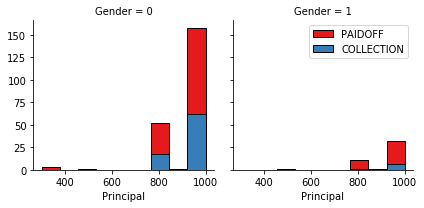

None

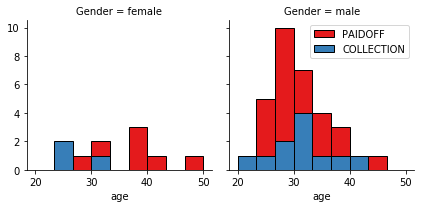

None

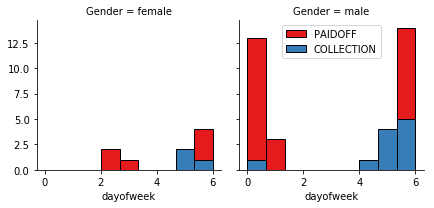

None

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,1,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,1,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:73: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.19611614, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  5.09901951, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.19611614, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.19611614,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.19611614, -0.86135677]])

In [209]:
df_test = pd.read_csv('loan_test.csv')
# Check the dataframe
display(df_test.head())

# Confirm the dimensions of the dataframe
display(df_test.shape)

# Change data to dt
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
display(df_test.head())

# Number of target classes
display(df_test['loan_status'].value_counts())

# Loans test data analysis - Gender
bins = np.linspace(df_test.Principal.min(), df_test.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
display(plt.show())

# Loans test data analysis - Gender / Age
bins = np.linspace(df_test.age.min(), df_test.age.max(), 10)
g = sns.FacetGrid(df_test, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
display(plt.show())

# Loan test data analysis - Days of the week
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
bins = np.linspace(df_test.dayofweek.min(), df_test.dayofweek.max(), 10)
g = sns.FacetGrid(df_test, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
display(plt.show())

# Set the threshold values less than day 4 on test data
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
display(df_test.head())

# Status by gender for test data
display(df_test.groupby(['Gender'])['loan_status'].value_counts(normalize=True))

# Convert gender to binary values in loan test data
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
display(df_test.head())

# Group by the education classification values
display(df_test.groupby(['education'])['loan_status'].value_counts(normalize=True))

# Examine all other headers in test df
display(df_test[['Principal','terms','age','Gender','education']].head())

# One hot encoding - loan test data
Feature_test = df_test[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(df_test['education'])], axis=1)

# Feature_test.drop(['Master or Above'], axis = 1,inplace=True) <-- not necessary to drop?
display(Feature_test.head())

# Load test data feature set definition
test_X = Feature_test
display(test_X[0:5])

# Loan test data labels
test_y = df_test['loan_status'].values
display(test_y[0:50])

# Loan Test Data Normalisation
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
display(test_X[0:5])

In [222]:
# Display test set dimensions
display('Test set:', test_X.shape,  test_y.shape)

# KNN
# apply KNN model to test data with k = optimised k
k = optimised_k
# Predict target values
knn_yhat = neighbour.predict(test_X)
display(knn_yhat[45:56])
# KNN Accuracy Evaluation
mean_accuracy = (metrics.accuracy_score(test_y, knn_yhat)) 
knn_jaccard_similarity_score = metrics.jaccard_similarity_score(test_y, knn_yhat)
knn_f1_score = metrics.f1_score(test_y, knn_yhat, average='weighted')
print("The KNN Jaccard similarity score is: ", knn_jaccard_similarity_score)
print("The KNN F1 Score is: ", knn_f1_score)

# Decision Tree
# Predict target values
decision_yhat = decision.predict(test_X)
display(decision_yhat[45:56])
# Accuracy Evaluation
decision_mean_accuracy = (metrics.accuracy_score(test_y, decision_yhat)) 
decision_jaccard_similarity_score = metrics.jaccard_similarity_score(test_y, decision_yhat)
decision_f1_score = metrics.f1_score(test_y, decision_yhat, average='weighted')
print("The Decision Tree Jaccard similarity score is: ", decision_jaccard_similarity_score)
print("The Decision Tree F1 Score is: ", decision_f1_score)

# SVM model

# Predict the target values
svm_yhat = svm_model.predict(test_X)
display(svm_yhat[45:56])
# Accuracy Evaluation
svm_mean_accuracy = (metrics.accuracy_score(test_y, svm_yhat))
svm_jaccard = jaccard_similarity_score(test_y, svm_yhat)
svm_f1 = f1_score(test_y, svm_yhat, average='weighted')
print("The SVM Jaccard similarity score is: ", svm_jaccard)
print("The SVM F1 Score is: ", svm_f1)

# Log Regression model
# Predict the target values in loan test using optimised log regression model
log_reg_yhat = log_reg_model.predict(test_X)
display(log_reg_yhat[45:56])
# Accuracy Evaluation
log_reg_mean_accuracy = (metrics.accuracy_score(test_y, log_reg_yhat))
log_reg_jaccard = jaccard_similarity_score(test_y, log_reg_yhat)
log_reg_f1 = f1_score(test_y, log_reg_yhat, average='weighted')
log_reg_yhat_prob = log_reg_model.predict_proba(X_test)
log_reg_log_loss = log_loss(y_test, log_reg_yhat_prob)
print("The Log Reg Jaccard similarity score is: ", log_reg_jaccard)
print("The Log Reg F1 Score is: ", log_reg_f1)
print("The Log Reg Log Loss Score is: ", log_reg_log_loss)

report_input = {
    '0': ['KNN', knn_jaccard_similarity_score, knn_f1_score, 'NA'],
    '1': ['Decision Tree', decision_jaccard_similarity_score, decision_f1_score, 'NA'],
    '2': ['SVM', svm_jaccard, svm_f1, 'NA'],
    'Logistic Regression': ['Logistic Regression', log_reg_jaccard, log_reg_f1, log_reg_log_loss]    
}


'Test set:'

(54, 9)

(54,)

array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF'], dtype=object)

The KNN Jaccard similarity score is:  0.7037037037037037
The KNN F1 Score is:  0.6959210617747202


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

The Decision Tree Jaccard similarity score is:  0.7222222222222222
The Decision Tree F1 Score is:  0.6704776923582364


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

The SVM Jaccard similarity score is:  0.7037037037037037
The SVM F1 Score is:  0.6119162640901772


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

The Log Reg Jaccard similarity score is:  0.7592592592592593
The Log Reg F1 Score is:  0.6717642373556352
The Log Reg Log Loss Score is:  0.6717663559618127


In [224]:
 pd.DataFrame.from_dict(report_input, orient='index',columns=['Jaccard', 'F1-score', 'LogLoss'])

,Jaccard,F1-score,LogLoss
KNN,0.703704,0.695921,NA
Decision Tree,0.722222,0.670478,NA
SVM,0.703704,0.611916,NA
Logistic Regression,0.759259,0.671764,0.671766


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>